Kelompok 5

> Raisyad Jullfikar 2106238

> Nadhief Athallah Isya 2106413

> Azzahra Fahriza 2102296

> M. Azka Atqiya 2100812

> Afina Rachmani 1901377

-- Mengimport Library yang di Perlukan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from google.colab import drive
import os
import matplotlib.pyplot as plt
import zipfile, os
import shutil

________________________________________________________________________________
Mengekstrak folder tujuan dari Google Drive serta Membaca Folder Konten (folder tujuan) yang ada di Google Drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# ekstrak

local_zip = '/content/drive/MyDrive/DATAMINING/datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

________________________________________________________________________________
Membaca data path folder dan file tujuan kedalam var base_dir (base directory)

In [4]:
base_dir = '/content/datasets'

________________________________________________________________________________
Membaca path directory dari var sebelumnya menggunakan syntax pathlib dan dimasukkan kedalam var data_dir (data directory)

In [5]:
data_dir = pathlib.Path(base_dir)

________________________________________________________________________________
Menghitung banyaknya gambar berekstensi jpg pada folder datasets

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3000


________________________________________________________________________________
Mengklasifikasikan berbagai kelas yang terdapat pada folder datasets

In [7]:
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
for x in list_dir:
 print("{} = {} ".format(x,len(list(data_dir.glob('{}/*.jpg'.format(x))))))

Jumlah class: 6 
Jumlah instance per class
Ruby = 500 
Fake_Emerald = 500 
Emerald = 500 
Fake_Ruby = 500 
Fake_Turquoise = 500 
Turquoise = 500 


________________________________________________________________________________
Menampilkan data dalam bentuk image pada indeks pertama[0]

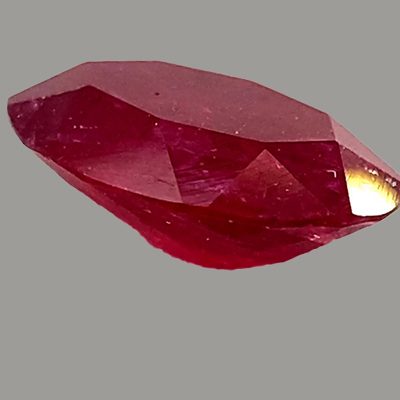

In [8]:
visual_img = list(data_dir.glob('Ruby/*'))
PIL.Image.open(str(visual_img[0]))


________________________________________________________________________________
Menentukan Ukuran tinggi dan lebar gambar serta ukuran batch

In [9]:
batch_size = 34
img_height = 200
img_width = 200
# 32 - 180 34 200 36 220

________________________________________________________________________________
Menyiapkan data training dengan mengambil 0.7 atau 70% dari data asli

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 data_dir,
 validation_split=0.7,
 subset="training",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 3000 files belonging to 6 classes.
Using 900 files for training.


________________________________________________________________________________
Menyiapkan data validasi dengan mengambil 0.1 atau 10% dari data validasi

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 data_dir,
 validation_split=0.2,
 subset="validation",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 3000 files belonging to 6 classes.
Using 600 files for validation.


Kami mengambil 70% data untuk train dan 10% data untuk validasi, dikarenakan kebutuhan data untuk train harus lebih banyak dibanding data untuk validasi

________________________________________________________________________________
Memasukkan nama - nama kelas kedalam var serta Menampilkan nama nama kelas

In [12]:
class_names = train_ds.class_names
print(class_names)

['Emerald', 'Fake_Emerald', 'Fake_Ruby', 'Fake_Turquoise', 'Ruby', 'Turquoise']


________________________________________________________________________________
Menampilkan preview dataset training

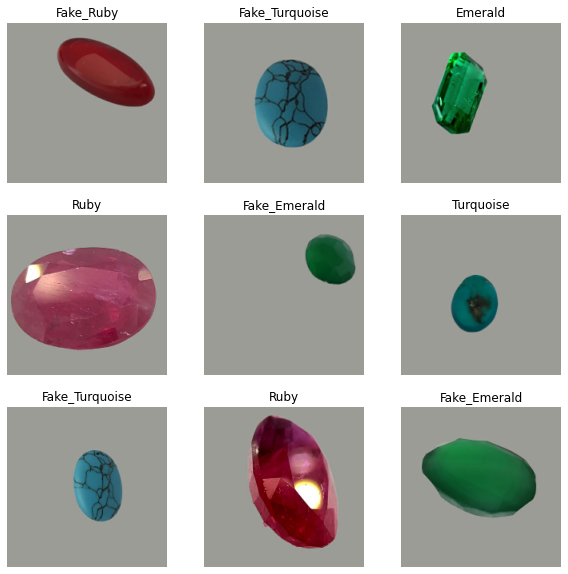

In [13]:
# lihat dataset training
 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
   ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")

________________________________________________________________________________
Memperlihatkan shape untuk data train

In [14]:
for image_batch, labels_batch in train_ds:
 print(image_batch.shape)
 print(labels_batch.shape)
 break

(34, 200, 200, 3)
(34,)


________________________________________________________________________________
Set cache buffer untuk meningkatkan efisiensi training

In [15]:
AUTOTUNE = tf.data.AUTOTUNE
 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

________________________________________________________________________________
Normalisasi nilai rgb dari 0-255 menjadi 0-1

In [16]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.0 1.0


________________________________________________________________________________
Membuat arsitektur deep learning

In [17]:
num_classes = len(class_names)
 
model = Sequential([
 layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes)
])

________________________________________________________________________________
Compile model

In [18]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

________________________________________________________________________________
Memperlihatkan arsitektur neural network

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

________________________________________________________________________________
Memproses data train

In [20]:
# Memproses data train yang sudah kita model sebelumnya
epochs= 5
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)

Epoch 1/5
27/27 [==============================] - 8s 93ms/step - loss: 1.2054 - accuracy: 0.5167 - val_loss: 0.5726 - val_accuracy: 0.7833
Epoch 2/5
27/27 [==============================] - 1s 37ms/step - loss: 0.4667 - accuracy: 0.8489 - val_loss: 0.5554 - val_accuracy: 0.7900
Epoch 3/5
27/27 [==============================] - 1s 35ms/step - loss: 0.3392 - accuracy: 0.8722 - val_loss: 0.3413 - val_accuracy: 0.8833
Epoch 4/5
27/27 [==============================] - 1s 35ms/step - loss: 0.2284 - accuracy: 0.9289 - val_loss: 0.2858 - val_accuracy: 0.8933
Epoch 5/5
27/27 [==============================] - 1s 36ms/step - loss: 0.2625 - accuracy: 0.8944 - val_loss: 0.3384 - val_accuracy: 0.8783


Kami hanya memproses epoch hingga 5 saja pada data train berikut, dikarenakan ketika memproses hingga epoch 10, maka data tersebut akan semakin overfitting yang mana gap antara train dan validasi semakin besar

________________________________________________________________________________
Membuat plot dari hasil proses train sebelumnya, untuk memperjelas

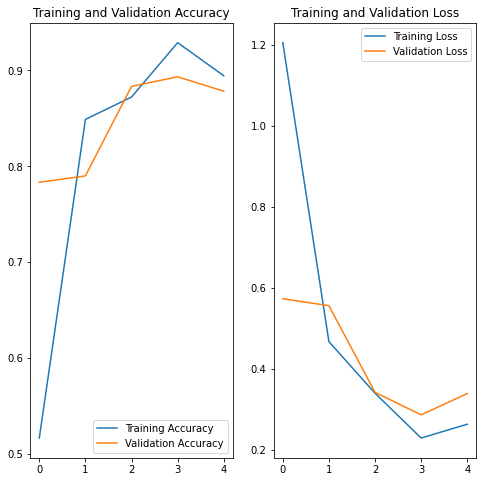

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# Plot dibawah ini terlihat masih buruk untuk bagian validation

Analisis yang kami dapatkan dari plot diatas adalah, plot tersebut masih termasuk kedalam plot yang overfitting dikarenakan
plot atau garis train dan validasi yang masih belum stabil serta gap antara train dengan validasi yang lumayan agak jauh, maka dari itu, kami mencoba cara untuk menghilangkan data overfitting diatas dengan cara yang sesuai dengan modul

________________________________________________________________________________
Mengatasi data overfitting yaitu dengan mengaugmentasi data training

In [22]:
data_augmentation = keras.Sequential(
 [
   layers.RandomFlip("horizontal",
                     input_shape=(img_height,
                                 img_width,
                                 3)),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.1),
 ]
)


________________________________________________________________________________
Test data sebelumnya berupa visual gambar

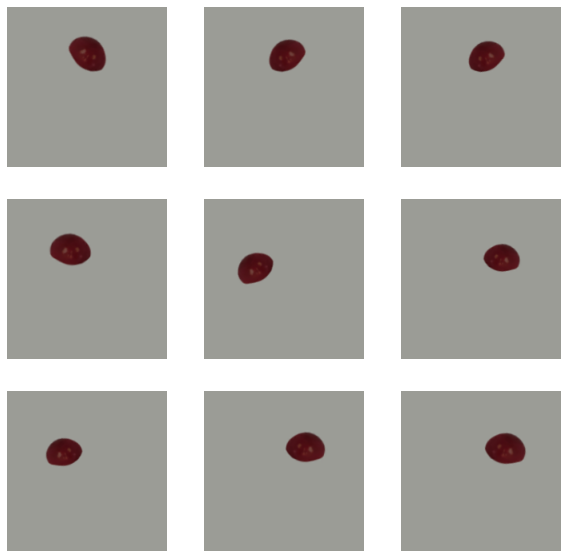

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
 for i in range(9):
   augmented_images = data_augmentation(images)
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(augmented_images[0].numpy().astype("uint8"))
   plt.axis("off")

________________________________________________________________________________
Menambahkan dropout, salah satu teknik untuk mengurangi overfitting dalam sebuah data

In [24]:
model = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


________________________________________________________________________________
Compile kembali model Arsitektur CNN yang sudah dibuat

In [25]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

________________________________________________________________________________
Lakukan kembali proses train

In [26]:
epochs = 10
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)

Epoch 1/10
27/27 [==============================] - 3s 61ms/step - loss: 1.5016 - accuracy: 0.4189 - val_loss: 0.9873 - val_accuracy: 0.6033
Epoch 2/10
27/27 [==============================] - 1s 54ms/step - loss: 0.8112 - accuracy: 0.6822 - val_loss: 0.5733 - val_accuracy: 0.7983
Epoch 3/10
27/27 [==============================] - 1s 53ms/step - loss: 0.5277 - accuracy: 0.8122 - val_loss: 0.4226 - val_accuracy: 0.8483
Epoch 4/10
27/27 [==============================] - 1s 51ms/step - loss: 0.4244 - accuracy: 0.8500 - val_loss: 0.3602 - val_accuracy: 0.8817
Epoch 5/10
27/27 [==============================] - 1s 53ms/step - loss: 0.3392 - accuracy: 0.8711 - val_loss: 0.3449 - val_accuracy: 0.8467
Epoch 6/10
27/27 [==============================] - 1s 53ms/step - loss: 0.3296 - accuracy: 0.8789 - val_loss: 0.2787 - val_accuracy: 0.8917
Epoch 7/10
27/27 [==============================] - 1s 52ms/step - loss: 0.2674 - accuracy: 0.8978 - val_loss: 0.2502 - val_accuracy: 0.9100
Epoch 8/10
27

Model yang telah dibuat kembali untuk mengurangi overfitting diproses kembali dengan 10 epoch, epoch kali ini agak berbeda dengan epoch sebelumnya dikarenakan agar plot dan val_accuracy semakin jelas angka dan grafik yang ditunjukkan, epoch ini menurut saya lebih bagus ketika dipasangkan 10 dibanding lebih atau kurang, dikarenakan ketika epoch tersebut lebih banyak, maka grafik yang ditampilkan dan val yang dihasilkan juga akan semakin tidak bagus atau yang disebut overfitting tadi, dan ketika epoch tersebut hanya 10, val dan grafik terlihat lumayan bagus

________________________________________________________________________________
Tampilkan kembali plot dari hasil proses train sebelumnya untuk mengetahui perbedaan dari model awal dan model sekarang

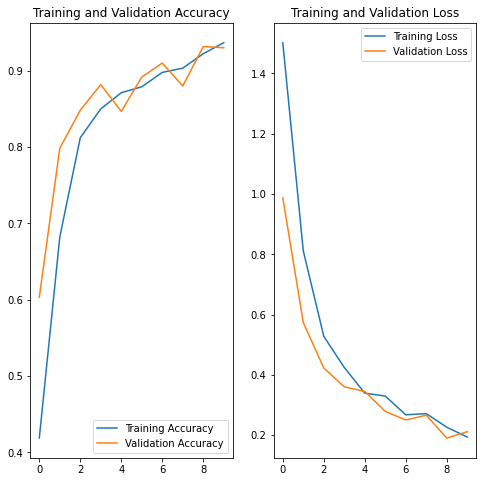

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Plot diatas sudah membaik daripada plot yang sebelumnya, yang mana plot ini sudah melewati proses pengatasan data overfitting, namun jika dilihat, bahwa grafik yang sebelah kanan yaitu accuracy, masih terlihat naik turun 'agak' drastis dibanding lossnya, Kami sudah mencoba mengubah batch size, ukuran serta lebar gambar yang ada di kode diatas, namun ketika kami ubah kode tersebut yang asalnya batch_size : 34, img_height : 200, img_width : 200, menjadi 36, 220, 220 atau menjadi 38, 240, 240, maka grafik tersebut akan semakin buruk, lebih buruk dari grafik sebelumnya yang mana terdapat gap antara train dan val sekitar 0.1 - 0.3

________________________________________________________________________________
Memprediksi jenis gemstones

1/1 [==============================] - 0s 136ms/step
This image most likely belongs to Emerald with a 100.00 percent confidence.


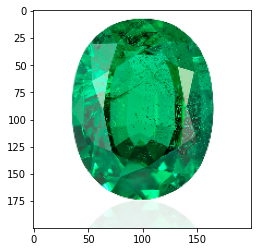

In [28]:
image_baru_url = "https://www.hirshlondon.com/media/wysiwyg/3reasons/emerald-largercopy.jpg"
image_baru_path = tf.keras.utils.get_file('pictz6', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
 
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
 
print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 16ms/step
This image most likely belongs to Ruby with a 100.00 percent confidence.


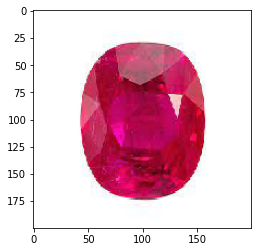

In [29]:
image_baru_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGBxIRExYUFBMXFBQWFhcYFxkWFhYWFhgZGRYZGBgWGRgZHyoiGRwnHRYWIzQkJysuMTExGCE2OzYwOiowMS4BCwsLDw4PHRERHTAoIicwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMP/AABEIAKcBLQMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAAAwEEBQYHAgj/xABFEAACAQICBgUJBAcHBQAAAAAAAQIDEQQhBRIxQVFhBnGBkaEHEyIycrHB0fAUI0JSQ2KCkqLh8RUWU4OTstIkM1Rjwv/EABoBAQADAQEBAAAAAAAAAAAAAAACAwQBBQb/xAAvEQACAQIFAQYGAgMAAAAAAAAAAQIDEQQSITFBUQVxgZHR8BMiYaGxweHxFUJS/9oADAMBAAIRAxEAPwDswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIMTiYUoudScYQSu5SajFLi28katpfylYGjdRlKvJf4a9H9+Vk11XBZTo1KrtCLfcbgDnE/KVUqJOlRjFP82tN89mqrmOrdMcdP8AT6q4RjBeOrcGyPZld72Xj6XOrlTjlXTuKltxFbsqzj/taI46RxD/AE1btq1P+Ry5L/Gy5kvudnBx2li6sf0tR9dSfxZPHHVP8Wp2VJr4nLkHgJLk62Dkq0lWWyvWX+dU/wCRNT07io7K9Xtlrf7kztyDwcuqOqA5n/e/GQV/O63tQhbb+rFPxLih5Q68fXpU5r9XWpvvbl7hci8HU4s/E6IDVMB0+w8/XhUp8XZTiu70v4TPaP0lRrq9KrGpbbqtXXWtq7TpTOjOGsl6eexegAFYAAAAAAAAAAAAAAAAAAAAAAAAAAAAIcRXjTi5zkoxim5NuySW1tgEkpJZvJGk9L+nn2eLWHjGclZa836Ku7XjFPWl1uy4a2ZrnTjppVxCaoylTowfVKbvlKXBXtaPa+C0GeKlJJSk5JO6Tbaz2vrZy57WE7Mvadby9bc+30L/AEppivi25167nJW1bt6t3t1Y5Rh2IsHBbmr8zzGo+XcviUc7/WXcTTXB7kVGMbJaeRm9Dr0ZLcnddT3X614mQ1V9M17RFfVqJbpJx+K8V4mwUo36vrYQejM1WcIy2JKVK/UXEaaWV8uWZEqi2Fdfmcuil1oNaJEkuRRNrPeefOBVTpU3G57i77dvAkjTzLeUz3TqvecK8kc21z3ioqyyLeEbHvFyta7srbX9ci0eNWxZ83ku7eSSuaqerWmvgXEe4pHSPm3rQb11skm426ms12GOr1nLa7+HgiFS3lkLRkmzXShGD+bY3vo55R5RepileN8qkVmlf8UfxLms+TOhYXEwqwU4SUoSV4yi7primcDSy6zPdE+lNTBT3zpSfpQ+MeE/B7HuaruebjOzIVE54dWfTjw6PpxxodlBa4HGU60I1KclKEleLX1k+RdA+eAAAAAAAAAAAAAAAAAAAAAAAABzLyi9IXVqfZ6b9CnL0rbJ1F+Hmou+XFckbj0y0x9kw05x9d+hD2pfi7FeXYce8SMnwet2Xhs8vivjbv6+H57ilaOtCUd7i18vGxr05X9/A2G5g8RHVnJbru3U817yD2PdiiK9vq/9SjDz32PUYJb/AA+Nzq1JW1PdCdnHgpXvZX23+C8TJ1ukWr+BSWWSvF77u+a3Rytv5GLccr8TxKndXsd1I1KeaGVr635NgwunqE9t6ftLLvjfxsX8ZwmrwkpL9VqXu2Gmxpkbg07q6e5rJ+A1Mc8OlHQ3ciq4mFP15Rj1tJ9i2s1X+0a7jqupO3XZ/vbfEso0pXvZvntBnWHaaNpxPSOlFegpT/hXjn4GMq9I6sm7NU1+qrvZxlz4GOUGVpuzzjc4aVSimv2ZPR2kNbJzc27tuTu+r65mQcjE3i2pqMYyX5bIyEKl7br87FkNdD0YULNtNPu93PU5kMptCUs8r2I6ya4ljRb8NuN7F7Qls7CWhh9Z8Y8eIweHbzlsW75l22Z5SsZpSUJG0+T/AE2qFRYeT+7qO0eCqPY+p7HztzOlHDYv62dp13otpL7Th4VH61tWXtRyb7dvaKb4Pnu0qFpKqud+/wB+7syoALDywAAAAAAAAAAAAAAAAAAAADQfKLinKrTp3yjDWftTdvBQX7xqdTCQlutzWRnel09bGVeC1UuynH43MU4lb3PpMNTyUINdF99f2WH9mSb9F63gzA9IMK4TvZpO62cH8rG04jFxpe1uS28r8DEaZTrp3fFpflf8+J214munm3exr1k95WMbuw1LOzWZcU4WJU4XdmalG5R0Vv2+BSxLqnmSNeRLZE2uhb6uZWe49u5SVRdbKitpJELiIJ7CutcW4si2VZdblcyXD1bcN25X7HuIU+0qsmM1yUXZ6F1NqW5Gz+TzTv2ar5mbtRqtdUJ7Iy5J+q/2XuNWhN78z3FlrjGSLKtKNaDjLk7bWpRl60VLrSfvNU8oeIpUKCiqdNVKktVNQipJRznJO1/yx/bLvoTp37TR1Jv72nZSvtlDZGfN7nzV95p3T3SfnsVJJ+jT+7Vs80/Skk8r611z1UY3Ts7M8fDYeSr5Zf66v9ef4MLQ0lOnl60eD29j/qZLCY+nUyvqy4SyfY9jMFVlfdblw5ZkSzfEi/oetJRb1Rtuqbx5LsU152i9no1F1+rL3QOX4DEVEr3y4P57Ubt5LNJQni9VXTdKaae/OLye/YRg1mMnaOGksPJyXF0+46qADQfJgAAAAAAAAAAAAAAAAAAAAHMekS/6mq//AGS95r+O0ovVhm98t3Zx6y98otacMZVg8oPUatwlGN78fSv3Gu03nfaRsfa0IwdCDk94qy8C4ldpyeeaWbzba55vYeIyd9/HLtuz1N+ilucm7b9y+D7yPVJNsinZWLLSmGtPW3N523MgpoyWlJJQkpLP1bcJfyeZjsNiFFpN2TJwklIvpST3JY0m9x4qUmkZLzS+mQY2F45bjfOg1Fs1ypJRZjHe5RxXAkxNW+dtiSR4ff1bDFbgyPLexS9txXWQBxpnEyqkuAdjzcq4hXF9D3EkIaT6yRMsgmTjJNF3onSVTDTVSm7SjdZ7GmrNNb18kyyqp7b9d9rKqRHOWbK6jVhaO/P9kUzxShYltme40pO9ls+rGVkFTvIjVVtJcFY2ryWSa0lQtvVRPq81N/BGqJNOzyZuvkgw+tjYv8kKk/Dzd/433EY2uU4qdsPNy/5f4sdpABoPjAAAAAAAAAAAAAAAAAAAAADmPliwMvOUay2Si4dTi2+9qf8ACaHGZ2vpxoh4vCVIRV5xWvDi5xvkucouUf2jiSiRe59J2bXU6Ci946eHHp4F5hnrNLe8lnZZntLLrLOK7jxXxqUWou72J8Od951G9pvYg0hidaXJOy6/xPvsizvnwK2JJWaWX1xIZbliLjR2M1bQk/R3cuXUXWMairL8WZiJRu+BJNP8xrpYiShlav0fJbGtJQytEs4FIRui1dR8zy8RKOTunzI/EVyh1Yp3ZewRXzZYwxsns+BJTxU1/RD4kTsa1N7Fyo2fMNEE8U7lHjHwCqxJOpBaFw1bwPDkUcr9yKN7iudfiJOx4dQa1+YaW88ORnzN7kHdEspfMu4Y6y9SyXB3LSnmj00T14Lqc5R1ieaktaTfFs6V5EMG9bEVWtijBP2m5SX8MO85soXzO8dANCfY8HThJWqT+8qcVJpWi+qKjHsIQTzXPK7WrZKDjzJ28L3f6XibGAC8+WAAAAAAAAAAAAAAAAAAAAABx7ymdHnharrQjejVk2rbIzecoPgnnJdq3HYS00lgadenKlUSlCas0/Bp7mnZp7mkGrmnCYl4epm3XK+nqfOVWs5b+xbCKadtm1my9Nei9XAVM3KVKT+7nsTW3VlbJSS79q5a7NvK7f8AK/8AUhufWQnGrBShszzSTTV4vu+rkzhvs+4Vqqlm7X5K2zitncUjUssi6OVclkdEe1TXBt8txDWwy/Wi+/4lzSpOXPZ1k2qrbCbaa0j7/P3LlQzrUxE6TWyV+y3zPEpuPrebftwT9xf1ZvfkiHFU98btc0VKN7uJkqU8useC3p4iN/UpP9ixNPHLdSo/u3IakWlsy4bF3LrfeeoYfK61V7T/AJEFKS2OQqV1oVlVvw7EkRlKrnw1vrqFNVFut1ZkUQcm3az8vaJ6E7vVWb4Hup6O3aQ4JVU3KKjrPjw4ldSbl6Syfaca0LYTeRaO7fTSwXpMTzdi6m0lb6RbyINFkoZdL95NSWWW73lEeMO3Zo2XoX0Pq4+pvhRi/TnbL2I39afu2vcnYtUhOrCnDPJ2SMn5Lui32mt5+pH7mlJON9kprOMeaWUn+yt7OylnozAU8PThSpxUYQVkve297bu297ZeE0rHyGMxTxNVz42S6IAA6ZQAAAAAAAAAAAAAAAAAAAAAAACy0no6niacqdWKnCSzT8Gnua3NHIulvk7xGGk50lKtQ3SitacFfZOmtu31o5b2kdqBxo1YbGVMO/l26Pb+H9UfNDopcyWjK2xJ9et8Gju+meimDxd3Voxcn+OPoT7ZK2t23NN0r5JXm8PXXJVVZ/vQX/ySVke7h+1sPPSp8v481+0jQ8JinFW1Vv8AS1Vrdj4/Mo8+P12maxfQXSFN50HNLfCSne3BJ63gY2vofE0/Wo1Y2/NCUfeWKelj1qOIpS0hJO/Rr+y2WGb2kOJWry7SaNKpw72UrYeT4diElfY1yi8jtFmPqYl8LkM8RLfTi+8yLwbXMpTw7e5lWVvkwZZS1zFl9pk8lFsnjSvtfyLr7BLjbqyPDwT4+46lbfUqbnrdORayVnlcrF73P4l9hdDYmp/28PVqJ7HCnOS70rGb0b5N9IVc3RVJcak4x8I60l3BWMqr0qW8kvprp4cmvUasZLP0X7ytLCqbUYwbcnaOqm5N8FFbTpWifJNTWeIrOf6tOKiu2U7trqSN00ToHDYVWo0owexyteb65u8n3kXqcrdt0YxtBZ31tZevkl3nPOiXkwlJqpir04bVTT+8ftyXqrks89x07B4WFGEadOKhCKtGMVZJckXACSR8/icXVxErzenC4XgAAdMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFVoQl60U+tJ+8tKuhcLL1sNRl10qb96MgAdTa2MVPo3gntwlD/Rpr3Ip/dfBf+LR/wBOPyMsBZEviT6vzMZDo9g1swtBf5NP5F3QwVKHqU4R9mMV7kXABFyct2AADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/9k="
image_baru_path = tf.keras.utils.get_file('pictr1', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
 
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
 
print(
   "This image most likely belongs to {} with a {:.2f} percent confidence."
   .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Gambar - gambar diatas merupakan sample gambar beberapa kelas yang belum ada sebelumnya di datasets, dan berhasil dipredict oleh model dengan persentase confidence yang sangat tinggi

##### Kesimpulan
Grafik/data yang dihasilkan ketika sebelum dan sesudah diatasi overfittingnya sangat berbeda, pengatasian overfitting tersebut dapat dilakukan berbagai macam cara, yang kami lakukan yaitu memakai cara modul serta mengubah batch size, lebar dan panjang gambar, serta jumlah data train dan validasi, sebelumnya kami mengubah settingan rgb menjadi hsv, hanya saja lebih menjadi aneh data yang dihasilkan, maka dari itu, data yang telah diproses diatas, adalah data yang terbaik menurut kami serta sample gambar yang diprediksi sudah mewakilkan akan kinerja model yang sudah dibuat